# Модель предпочтительного присоединения. Модель тесного мира Уотса-Строгатса. Случайные сети.

__Авторы задач: Макрушин С.В (SVMakrushin@fa.ru), Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Макрушин С.В. "Лекция 2: Модели"
* Документация:
    * https://networkx.org/documentation/stable/reference/generated/networkx.generators.random_graphs.barabasi_albert_graph.html
    * https://networkx.org/documentation/stable/reference/generated/networkx.generators.random_graphs.extended_barabasi_albert_graph.html
* Дополнительные источники:
    * https://barabasi.com/f/623.pdf

## Вопросы для совместного обсуждения

1\. Обсудите модель предпочтительного присоединения

2\. Обсудите модель тесного мира Уотса-Строгатса

3\. Обсудите конфигурационную модель и модель случайного геометрического графа

## Задачи для самостоятельного решения

In [116]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from collections import Counter
import pandas as pd

<p class="task" id="1"></p>

1\. Используя реализацию модели предпочтительного присоединения Барабаши-Альберта из `networkx`, постройте сеть с кол-вом узлов `n` > 50. Визуализируйте полученный граф, сделайте размер и цвет узлов пропорциональными их степени. Постройте график выборочной функции распределения степеней узлов для сети.

- [ ] Проверено на семинаре

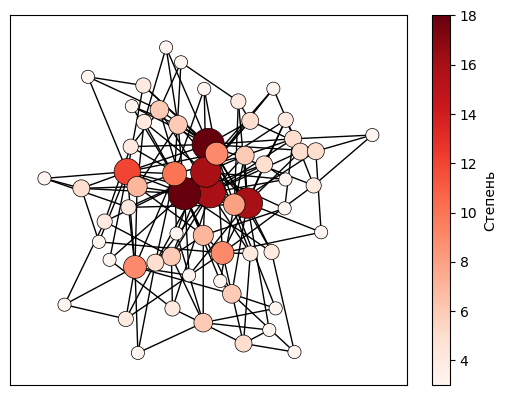

In [117]:
G = nx.barabasi_albert_graph(60, 3)
pos = nx.spring_layout(G)
degrees = np.array(list(dict(G.degree).values()))
nodes = nx.draw_networkx_nodes(G, pos=pos, node_color=degrees,
                                node_size=degrees*30, cmap=plt.cm.Reds,
                                edgecolors='black', linewidths=0.5)
edges = nx.draw_networkx_edges(G, pos=pos)
plt.colorbar(nodes, label='Степень')
plt.show()

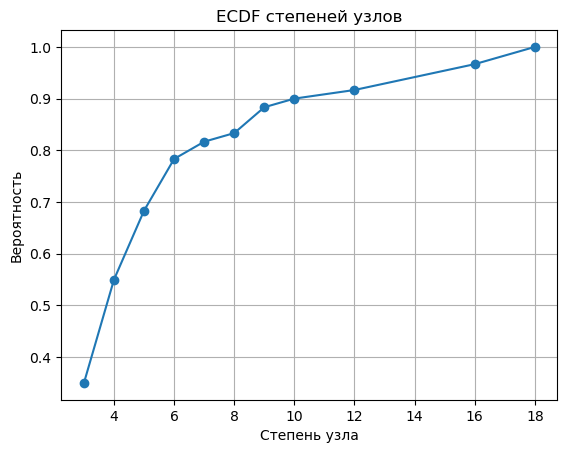

In [118]:
ecdf = stats.ecdf(degrees).cdf

plt.plot(ecdf.quantiles, ecdf.probabilities, marker='o')
plt.grid(which='both')
plt.title('ECDF степеней узлов')
plt.xlabel('Степень узла')
plt.ylabel('Вероятность')

plt.show()

<p class="task" id="2"></p>

2\. Используя реализацию модели предпочтительного присоединения Барабаши-Альберта из `networkx`, постройте сеть с кол-вом узлов `n=10000`. Визуализируйте закон распределения степеней узлов сети в обычной и логарифимических (по 1й и по 2м осям) системах координат.

- [ ] Проверено на семинаре

In [119]:
G = nx.barabasi_albert_graph(10_000, 3)
degrees = np.array(list(dict(G.degree).values()))

counts = Counter(degrees)
sorted_degrees = sorted(counts.keys())
pdf = [counts[d] / len(degrees) for d in sorted_degrees]
sum(pdf)

1.0

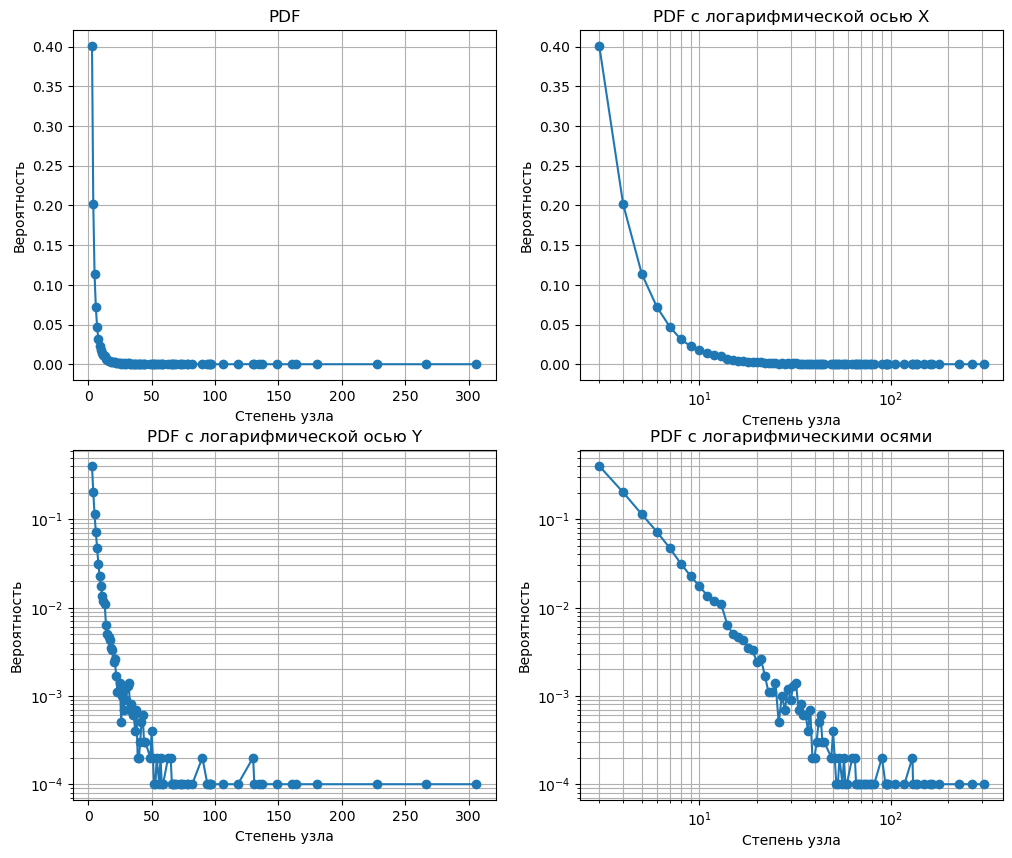

In [120]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

axes[0, 0].plot(sorted_degrees, pdf, marker='o')
axes[0, 0].grid(which='both')
axes[0, 0].set_title('PDF')
axes[0, 0].set_xlabel('Степень узла')
axes[0, 0].set_ylabel('Вероятность')

axes[0, 1].plot(sorted_degrees, pdf, marker='o')
axes[0, 1].grid(which='both')
axes[0, 1].set_xscale('log')
axes[0, 1].set_title('PDF с логарифмической осью X')
axes[0, 1].set_xlabel('Степень узла')
axes[0, 1].set_ylabel('Вероятность')

axes[1, 0].plot(sorted_degrees, pdf, marker='o')
axes[1, 0].grid(which='both')
axes[1, 0].set_yscale('log')
axes[1, 0].set_title('PDF с логарифмической осью Y')
axes[1, 0].set_xlabel('Степень узла')
axes[1, 0].set_ylabel('Вероятность')

axes[1, 1].plot(sorted_degrees, pdf, marker='o')
axes[1, 1].grid(which='both')
axes[1, 1].set_xscale('log')
axes[1, 1].set_yscale('log')
axes[1, 1].set_title('PDF с логарифмическими осями')
axes[1, 1].set_xlabel('Степень узла')
axes[1, 1].set_ylabel('Вероятность')

plt.show()

<p class="task" id="3"></p>

3\. Визуализируйте закон распределения степеней узлов с использованием log-binning для сети из предыдущего задания. Для сравнения на этом же графике изобразите график закона распределения без использования log-binning в log-log координатах.

- [ ] Проверено на семинаре

In [121]:
def log_binning(x, n):
  x_min, x_max = x.min(), x.max()
  pts = np.logspace(np.log10(x_min), np.log10(x_max), n) 

  x_bin = []
  y_bin = []

  for a, b in zip(pts, pts[1:]):
    c = np.sum((x >= a) & (x < b))
    x_bin.append((a + b) / 2)
    y_bin.append(c / len(x))

  return x_bin, y_bin

x_bin_log, y_bin_log = log_binning(degrees, 30)

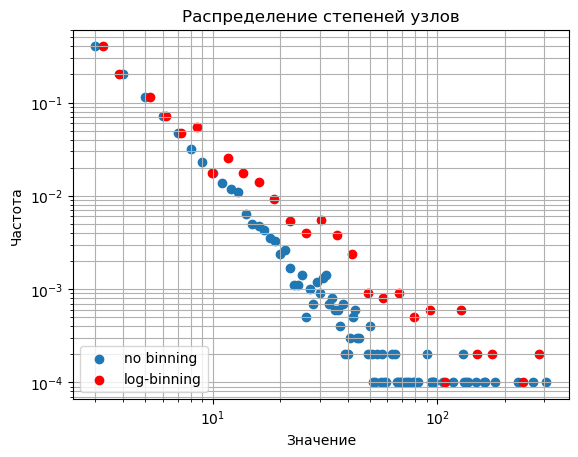

In [ ]:
plt.scatter(sorted_degrees, pdf, label='no binning')
plt.scatter(x_bin_log, y_bin_log, c='r', label='log-binning')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Степень узла')
plt.ylabel('Частота')
plt.grid(True, which='both')
plt.legend(loc='lower left')
plt.title('Распределение степеней узлов')

plt.show()

<p class="task" id="4"></p>

4\.  C помощью реализации модели Уотса-Строгатса из `networkx` сгенерируйте сети с кол-вом узлов порядка 1000 и с разным p. В качестве `p` рассмотрите несколько значений, равномерно распределенных по логарифмической шкале на отрезке $[10^{-4}, 1]$.

Визуализируйте результаты пересвязывания, построив на одном графике относительные изменения среднего коэффициента кластеризации и средней длины пути относительно варианта сети без пересвязывания. Обозначьте точки разных графиков различными маркерами и цветами. Добавьте легенду.

- [ ] Проверено на семинаре

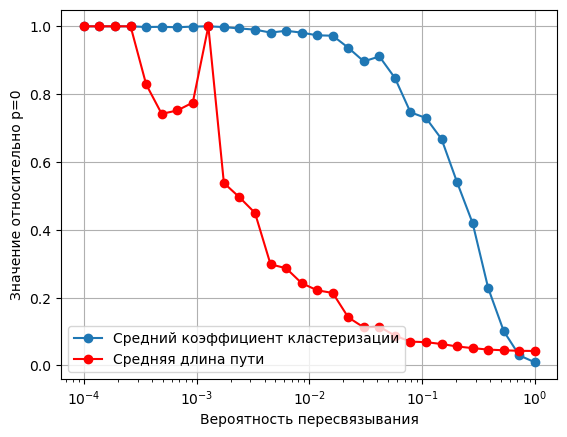

In [47]:
probs = np.logspace(-4, 0, 30)
G = nx.watts_strogatz_graph(1000, 4, 0)
clasts = []
paths = []

clast = nx.average_clustering(G)
path = nx.average_shortest_path_length(G)

for p in probs:
    G_p = nx.watts_strogatz_graph(1000, 4, p)
    clast_p = nx.average_clustering(G_p)
    path_p = nx.average_shortest_path_length(G_p)
    clasts.append(clast_p / clast)
    paths.append(path_p / path)

plt.plot(probs, clasts, marker='o', label='Средний коэффициент кластеризации')
plt.plot(probs, paths, marker='o', label='Средняя длина пути', color='r')
plt.xlabel('Вероятность пересвязывания')
plt.ylabel('Значение относительно p=0')
plt.xscale('log')
plt.grid(True)
plt.legend(loc='lower left')
plt.show()

<p class="task" id="5"></p>

5\. Создайте неориентированный граф на основе набора данных fb-pages-food с сайта https://networkrepository.com/ . C помощью `nx.configuration_model` постройте рандомизированный аналог данной сети. Визуализируйте исходный и рандомизированный граф рядом. Проверьте, совпадают ли распределения степеней узлов исходного и рандомизированного графа.

- [ ] Проверено на семинаре

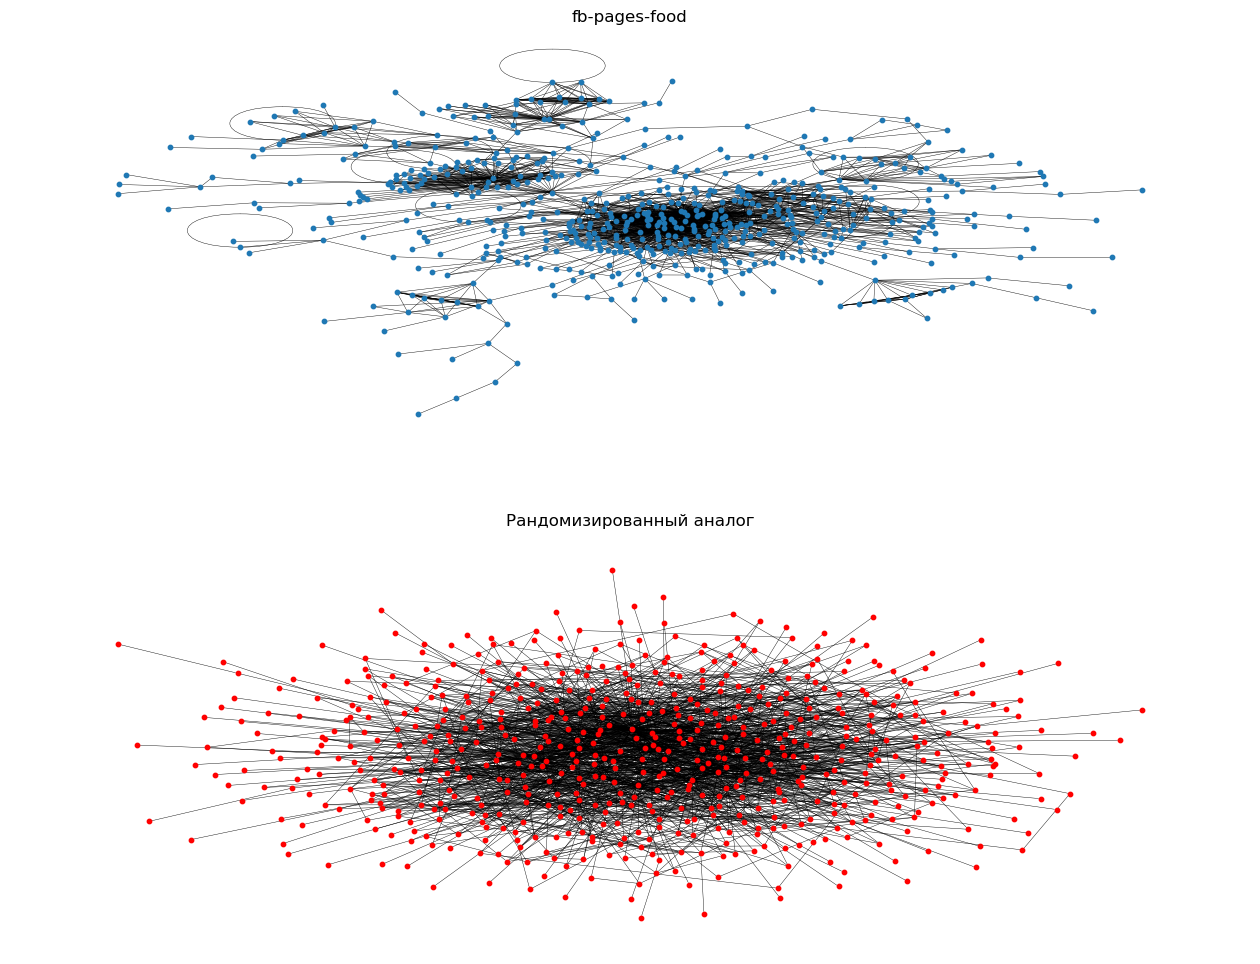

In [114]:
nodes = pd.read_csv('data/fb-pages-food/fb-pages-food.nodes')
edges = pd.read_csv('data/fb-pages-food/fb-pages-food.edges', header=None)
G = nx.Graph()

for _, row in nodes.iterrows():
    G.add_node(row['new_id'], name=row['name'])

G.add_edges_from(edges.to_numpy())

G_random = nx.configuration_model(dict(G.degree()).values())

fig, axes = plt.subplots(2, 1, figsize=(16, 12))
pos_G = nx.kamada_kawai_layout(G)
pos_G_random = nx.kamada_kawai_layout(G_random)
nx.draw(G, pos=pos_G, ax=axes[0], width=0.3, node_size=10)
axes[0].set_title('fb-pages-food')
nx.draw(G_random, pos=pos_G_random, ax=axes[1], node_size=10, width=0.3, node_color='r')
axes[1].set_title('Рандомизированный аналог')
plt.show()

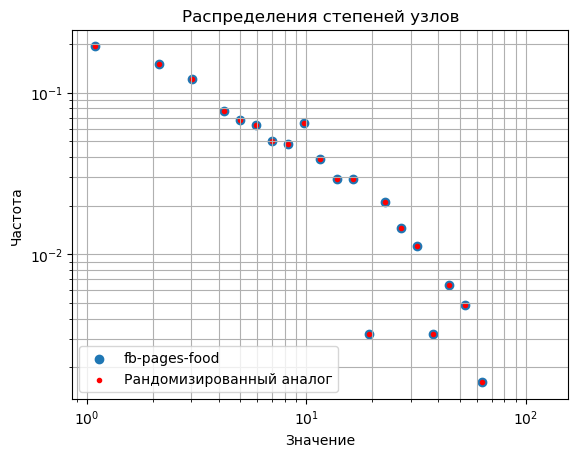

In [ ]:
degrees = np.array(list(dict(G.degree).values()))
degrees_rand = np.array(list(dict(G_random.degree).values()))

x_bin_log, y_bin_log = log_binning(degrees, 30)
x_bin_log_rand, y_bin_log_rand = log_binning(degrees_rand, 30)

plt.scatter(x_bin_log, y_bin_log, marker='o', label='fb-pages-food')
plt.scatter(x_bin_log_rand, y_bin_log_rand, marker='.', c='r', label='Рандомизированный аналог')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Степень узла')
plt.ylabel('Частота')
plt.grid(True, which='both')
plt.legend(loc='lower left')
plt.title('Распределения степеней узлов')

plt.show()

<p class="task" id="6"></p>

6\. C помощью реализации алгоритма постоения случайного геометрического графа из `networkx` сгенерируйте сеть с кол-вом узлов порядка 500 при радиусе `r=0.2` и $L^2$ метрикой для вычисления расстояния. Визуализируйте полученный граф, уменьшив размер узлов и сделав цвет ребер черным прозрачным (используйте RGBA). Визуализируйте распределение степеней узлов полученного графа.

Повторите решение задачи, использовав $L^1$ метрику для вычисления расстояния. Сравните результаты и сделайте выводы.

- [ ] Проверено на семинаре

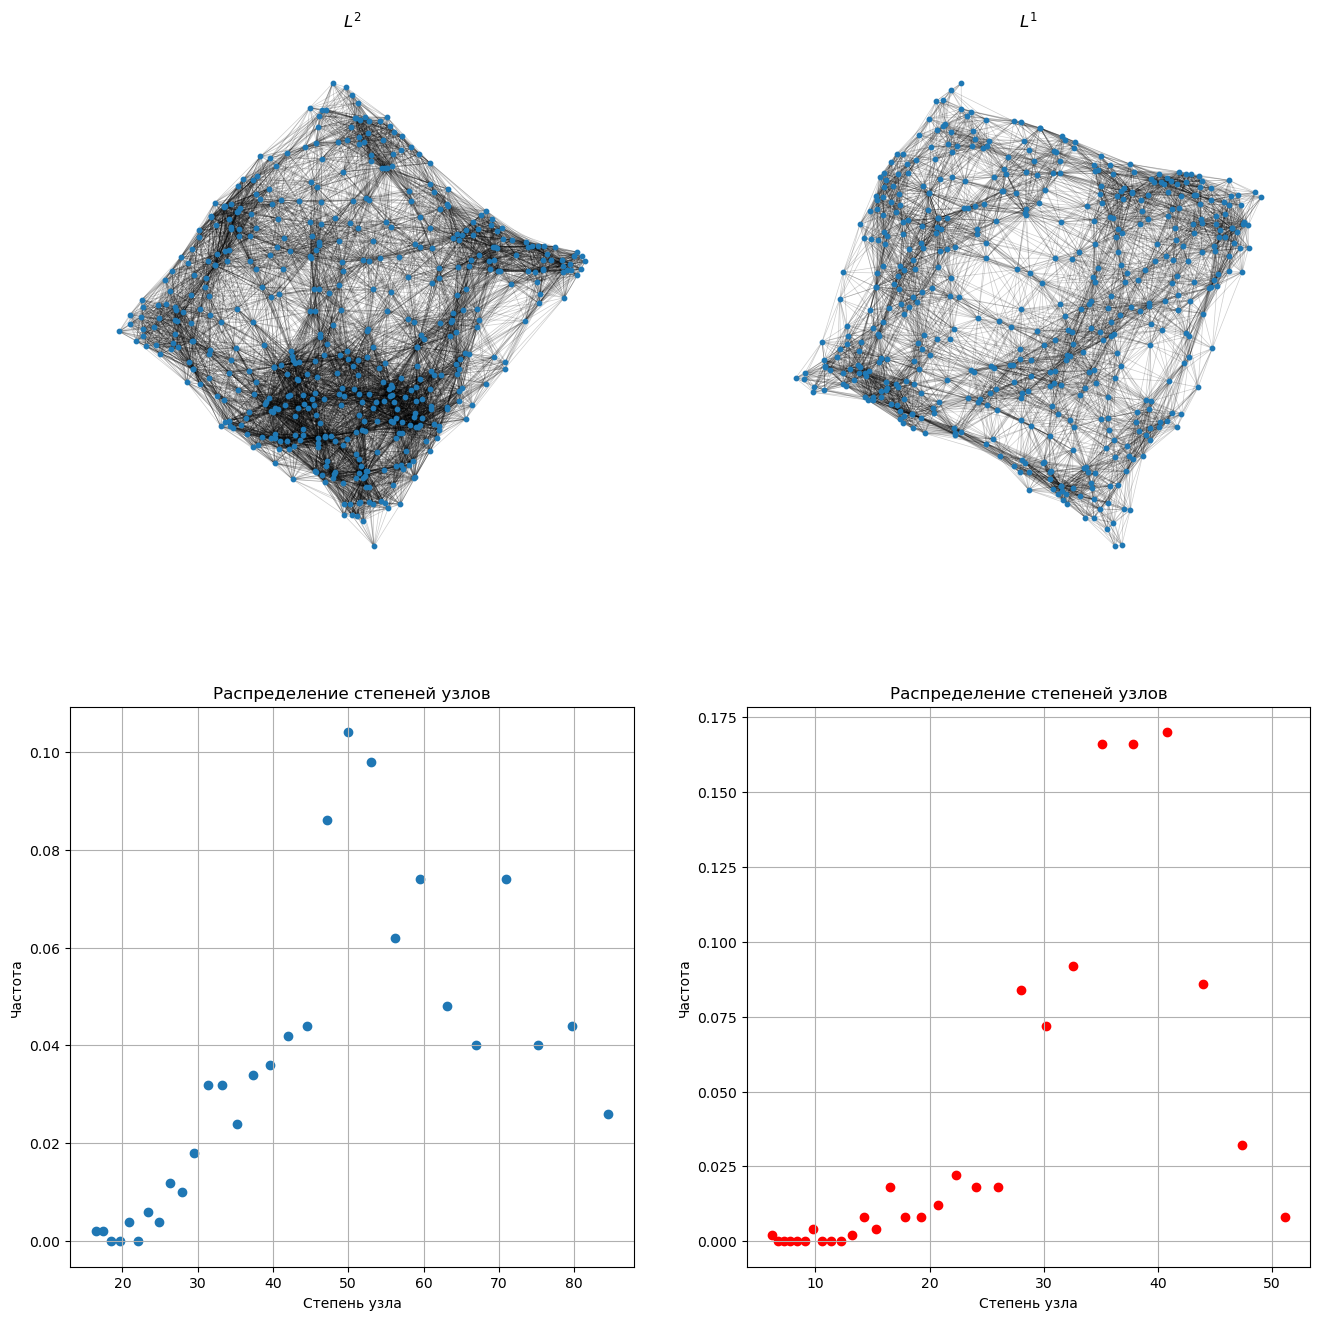

In [155]:
G_l2 = nx.random_geometric_graph(500, 0.2, p=2)
G_l1 = nx.random_geometric_graph(500, 0.2, p=1)

fig, axes = plt.subplots(2, 2, figsize=(16, 16))
nx.draw(G_l2, ax=axes[0, 0], node_size=10, width=0.5, edge_color=(0, 0, 0, 0.2))
axes[0, 0].set_title('$L^2$')
nx.draw(G_l1, ax=axes[0, 1], node_size=10, width=0.5, edge_color=(0, 0, 0, 0.2))
axes[0, 1].set_title('$L^1$')

degrees_l2 = np.array(list(dict(G_l2.degree).values()))
x_bin_log_l2, y_bin_log_l2 = log_binning(degrees_l2, 30)

degrees_l1 = np.array(list(dict(G_l1.degree).values()))
x_bin_log_l1, y_bin_log_l1 = log_binning(degrees_l1, 30)

axes[1, 0].scatter(x_bin_log_l2, y_bin_log_l2)
axes[1, 0].set_xlabel('Степень узла')
axes[1, 0].set_ylabel('Частота')
axes[1, 0].grid(True, which='both')
axes[1, 0].set_title('Распределение степеней узлов')

axes[1, 1].scatter(x_bin_log_l1, y_bin_log_l1, c='r')
axes[1, 1].set_xlabel('Степень узла')
axes[1, 1].set_ylabel('Частота')
axes[1, 1].grid(True, which='both')
axes[1, 1].set_title('Распределение степеней узлов')

plt.show()